In [1]:
%cd /home/aditya/Documents/SolarCycleProject/code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import gaussian
import src.preprocesser as pre
import src.network as network
import src.plotter as plotter 
from src.hyperparams import *

# import tf.keras
%load_ext autoreload
%matplotlib inline
%load_ext tensorboard

/home/aditya/Documents/SolarCycleProject/code


In [2]:
%autoreload

In [3]:
# Getting the data
headers = ["Year",
           "Month",
           "Day",
           "Decimal Date",
           "Daily Total Sunspot Number",
           "Sunspot Number Stddev",
           "No of observations",
           "Definitive/Provisional"
]
filename = "data/SN_d_tot_V2.0.csv"
data = pd.read_csv(filename, delimiter=";", names=headers)

In [4]:
data

,Year,Month,Day,Decimal Date,Daily Total Sunspot Number,Sunspot Number Stddev,No of observations,Definitive/Provisional
0,1818,1,1,1818.001,-1,-1.0,0,1
1,1818,1,2,1818.004,-1,-1.0,0,1
2,1818,1,3,1818.007,-1,-1.0,0,1
3,1818,1,4,1818.010,-1,-1.0,0,1
4,1818,1,5,1818.012,-1,-1.0,0,1
...,...,...,...,...,...,...,...,...
73743,2019,11,26,2019.903,0,0.0,17,0
73744,2019,11,27,2019.905,0,0.0,12,0
73745,2019,11,28,2019.908,0,0.0,11,0
73746,2019,11,29,2019.911,0,0.0,26,0


In [5]:
# Data Preprocessing
dates, spots, inverter = pre.preprocess(data)

ymax: 528.0 ymin: 0.0
x.shape: (73741,)
y.shape: (73741,)
y values scaler: 528.0


In [6]:
if mean_type == "gaussian":
    weights = gaussian(M=mean_length, std=0.1, sym=True)
    weights /= np.sum(weights) # normalise the weights
    spots = pre.running_mean_helper(spots, weights)
elif mean_type == "uniform":
    weights = np.ones(mean_length)/mean_length
    spots = pre.running_mean_helper(spots, weights)
else:
    pass


In [7]:
X = np.diff(spots)
index = dates[1:]
x_slid, y_slid, idx_slid = pre.sliding_window_main(X, X, index)
x_train, y_train, idx_train, x_val, y_val, idx_val, x_test, y_test, idx_test = pre.data_splitting_main(x_slid, y_slid, idx_slid)

x_slid.shape: (73736, 4, 1)
y_slid.shape: (73736, 1)
x_train.shape:  (44224, 4, 1)
y_train.shape:  (44224, 1)
idx_train.shape:  (44224,)
x_val.shape:  (14752, 4, 1)
y_val.shape:  (14752, 1)
idx_val.shape:  (14752,)
x_test.shape:  (14752, 4, 1)
y_test.shape:  (14752, 1)
idx_test.shape:  (14752,)



In [8]:
net = network.create_network()

In [9]:
history = network.trainer(net, x_train, y_train, x_val, y_val, verbose=1)
# net.load_weights("models/run_200515_1236.hdf5")
var_train = np.var(y_train)
var_val = np.var(y_val)
print("Variance in y_train:", var_train)
print("Variance in y_val:", var_val)

Train on 44224 samples, validate on 14752 samples
Epoch 1/100
44224/44224 [==============================] - 21s 471us/sample - loss: 2.4528e-05 - val_loss: 5.6833e-06
Epoch 2/100
44224/44224 [==============================] - 14s 319us/sample - loss: 5.1766e-06 - val_loss: 3.2873e-06
Epoch 3/100
44224/44224 [==============================] - 14s 320us/sample - loss: 5.7020e-06 - val_loss: 5.9709e-06
Epoch 4/100
44224/44224 [==============================] - 14s 323us/sample - loss: 5.7970e-06 - val_loss: 5.8643e-06
Epoch 5/100
44224/44224 [==============================] - 14s 326us/sample - loss: 5.7546e-06 - val_loss: 5.1133e-06
Epoch 6/100
44224/44224 [==============================] - 14s 325us/sample - loss: 5.7487e-06 - val_loss: 4.2961e-06
Epoch 7/100
44224/44224 [==============================] - 15s 336us/sample - loss: 5.6659e-06 - val_loss: 3.9784e-06
Epoch 8/100
44224/44224 [==============================] - 15s 329us/sample - loss: 5.5847e-06 - val_loss: 3.7031e-06
Epoch 

pred1.shape: (14752, 1)
pred2.shape: (44224, 1)


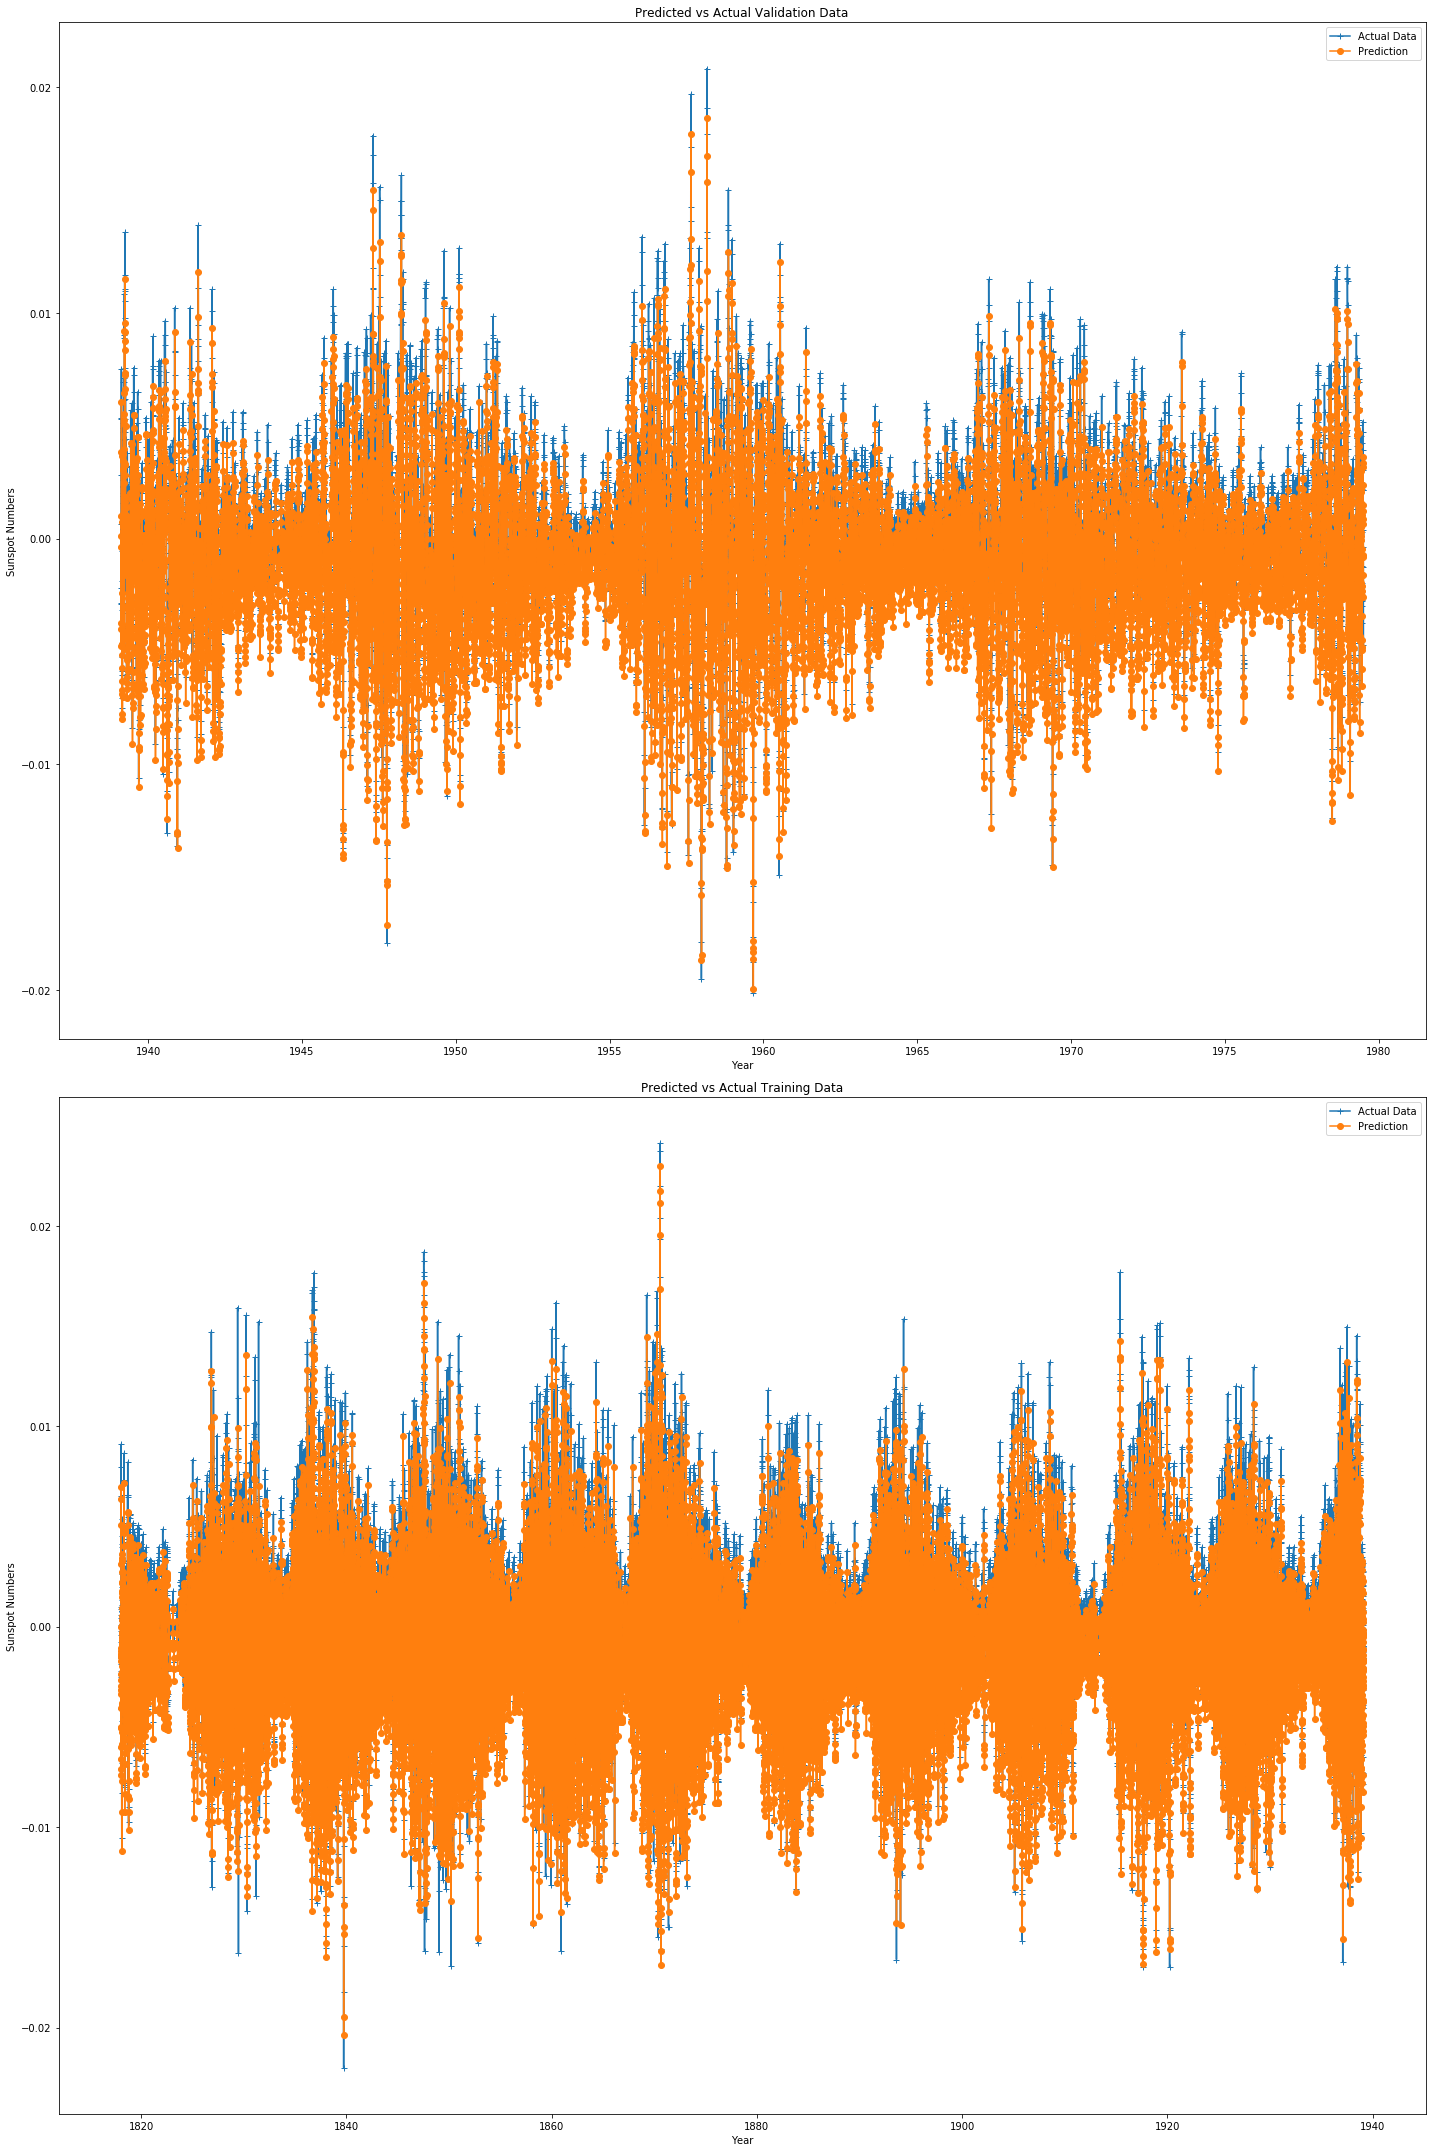

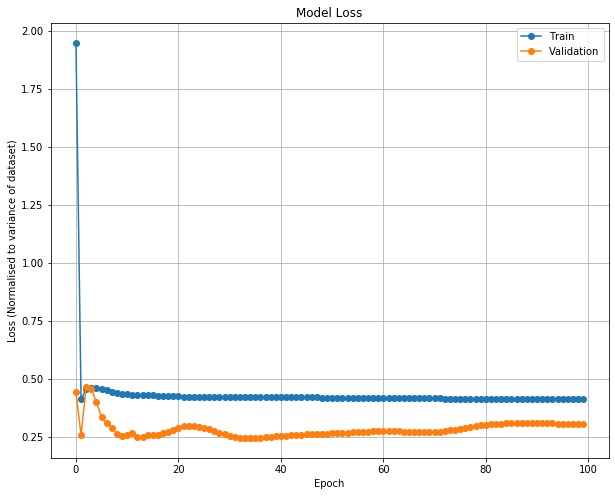

In [10]:
plotter.plot_predictions(net, x_train, y_train, idx_train, x_val, y_val, idx_val)
plotter.plot_loss_vs_epoch(history, var_train, var_val)

[array([[ -0.28343186,   0.23983939,  -0.06901369,  -0.5189313 ,
          -0.4732215 ,   0.06531018,   0.5135846 ,   0.5396984 ,
          -2.8861852 ,  27.675503  , -10.623502  ,   7.7669435 ,
          -0.3660053 ,   0.5102615 ,  -0.5033573 ,  -0.35351914]],
       dtype=float32),
 array([[ 0.13943094, -0.04989725, -0.10240442, -0.10702012, -0.3603512 ,
         -0.29316175,  0.03041606, -0.5339094 , -0.33391058,  0.1440122 ,
         -0.77282983, -1.5976076 ,  0.2790359 , -0.2991312 ,  0.07861635,
          0.21507731],
        [-0.41767123,  0.1258196 ,  0.84561026,  0.84336376, -0.17907922,
         -0.24689893,  0.12608851,  0.50513345, -0.0651676 , -1.2068236 ,
         -0.38139042,  0.11444681, -0.07833129,  0.69713825,  0.81582373,
          1.4251132 ],
        [ 0.23281837,  0.20768504,  0.17284831, -0.19062835,  0.05680173,
          0.2613513 ,  0.3749221 ,  0.03379348,  1.1654134 ,  1.0366151 ,
          0.8273119 , -0.84579104, -0.19233897, -0.49824983, -0.14149973,
   

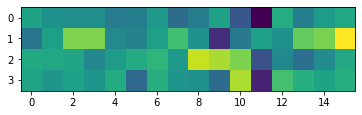

In [11]:
weights = net.get_weights()
plt.imshow(weights[1])
weights

In [12]:
predictor = network.create_network(predictor=True)
predictor.set_weights(net.get_weights())

idx_step = np.average(np.diff(idx_slid))
x_start = x_train[:batch_size, :, :]
idx_start = idx_train[:batch_size]
idx_end = idx_train[-1]
args = (
    predictor,
    x_start,
    idx_start,
    idx_end,
    idx_step
)
predictor.reset_states()
# net.reset_states()
npred = predictor.predict(x_train, batch_size=1)
rpred, idx_rpred = network.predict_from_self(*args)
# loss_func = keras.losses.MeanSquaredError()
# print("Loss: %.4f" % loss_func(y_train, rpred))

Going to enter the loop now.
num_iters: 44225
timesteps: 4
Out of the loop now.


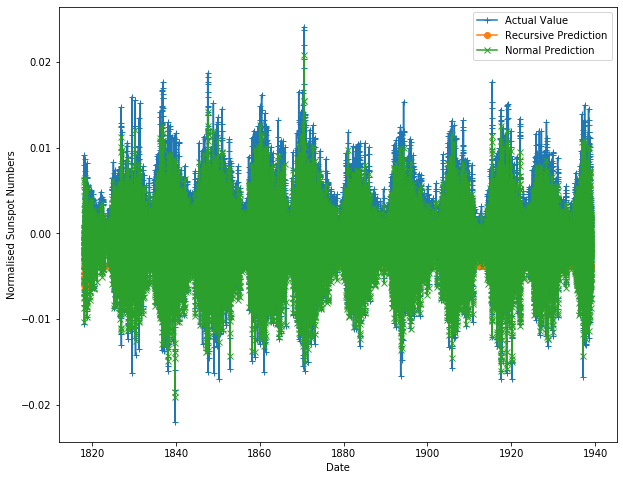

In [19]:
plt.figure(figsize=(10,8))
plt.plot(idx_train, y_train, label="Actual Value", marker="+")
plt.plot(idx_rpred, rpred, label="Recursive Prediction", marker="o")
# plt.plot(x_start[:, 1], marker="s")
# plt.plot(predictor.predict(x_start, batch_size=1), marker=".")
plt.plot(idx_train, npred, label="Normal Prediction", marker="x")

plt.xlabel("Date")
plt.ylabel("Normalised Sunspot Numbers")
plt.legend()

In [14]:
print("x:", x_train[:2, :])
print("y:", y_train[:2])

x: [[[-0.00105745]
  [ 0.00019304]
  [ 0.00206876]
  [ 0.00428454]]

 [[ 0.00019304]
  [ 0.00206876]
  [ 0.00428454]
  [ 0.00650032]]]
y: [[0.00650032]
 [0.0079775 ]]


0.0021264868383001887


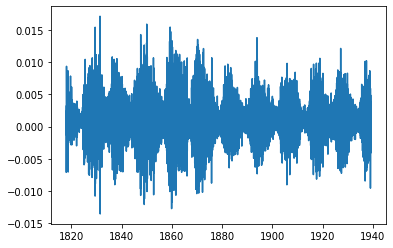

In [21]:
diff_train = y_train - net.predict(x_train)
print(np.std(diff_train))
plt.plot(idx_train, diff_train)

0.0004866006242923395


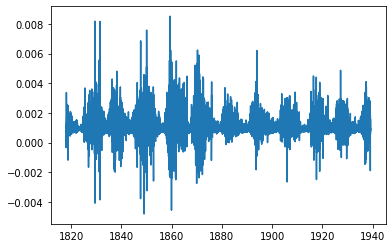

In [22]:
diff_train_shift = y_train[:-1] - net.predict(x_train)[1:]
print(np.std(diff_train_shift))
plt.plot(idx_train[1:], diff_train_shift)

In [17]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 31187), started 3:36:27 ago. (Use '!kill 31187' to kill it.)